<a href="https://colab.research.google.com/github/Jackyscy/cv/blob/main/SOM_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=60e2eed42ac15abc873691435df1952772ecaa3668676399695c2677f8f51595
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built MiniSom


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [33]:
dataset = pd.read_csv("2023_one hours_1 _On_state_with_id.csv",parse_dates=["Date_Time"],
        index_col=["Date_Time"])
X = dataset.iloc[:, :].values
#y = dataset.iloc[:, -1].values


In [34]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3685 entries, 2023-01-20 16:00:00 to 2023-10-29 22:00:00
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3685 non-null   int64  
 1   Combust Monitor Actual Spread 1  3685 non-null   float64
 2   Gt Exhaust Outlet Temp           3685 non-null   float64
 3   Turbine Speed In RPM             3685 non-null   float64
 4   GT Fuel Gas Mass Flow            3685 non-null   float64
 5   GT Gross MW                      3685 non-null   float64
 6   GT Compres Inlet Temp            3685 non-null   float64
 7   GT IGV Position                  3685 non-null   float64
 8   GT Turbine Inlet Temperature     3685 non-null   float64
 9   GT Swirl Angle                   3685 non-null   float64
 10  GT Efficiency Actual (LHV)       3685 non-null   float64
 11  GT (Expander) Efficiency         3685 non-null

In [35]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [36]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 48, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

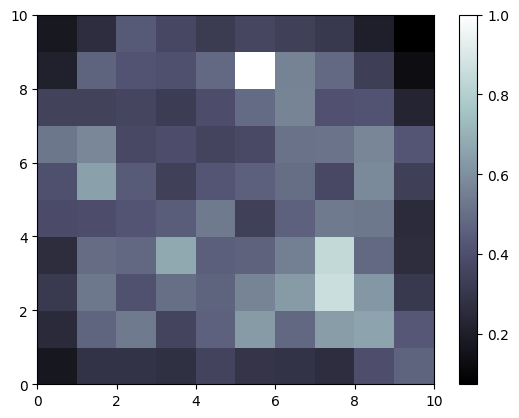

In [37]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()


In [40]:
mappings = som.win_map(X)
#anomaly = mappings[(3,4)]
#anomaly = sc.inverse_transform(anomaly)
frauds = mappings[(5,8)]

#frauds = np.concatenate((mappings[(3,5)],mappings[(4,4)]), axis=0)

In [41]:
frauds = sc.inverse_transform(frauds)
#anomaly_inverse = sc.inverse_transform(anomaly)
frauds

array([[ 410.   ,   39.385,  636.947, 2997.869,    6.651,   60.586,
          34.027,   42.82 , 1037.466,  159.067,   19.344,   76.867,
          23.795,  101.516,  570.24 ,  375.014,   22.643,  624.181,
         639.054,  641.034,  642.83 ,  621.137,  640.737,  626.549,
         603.56 ,  637.567,  638.427,  617.916,  629.151,  639.854,
         632.808,  637.184,  637.396,  639.652,  639.679,  637.631,
         640.064,  643.153,  640.723,  643.664,  641.588,  641.603,
         644.955,  642.368,  638.487,  639.587,  639.082,  639.467],
       [ 643.   ,   40.284,  639.017, 2998.319,    7.588,   68.658,
          32.07 ,   48.613, 1041.717,  154.319,   18.294,   72.403,
          24.807,  101.372,  605.1  ,  453.704,   23.78 ,  624.174,
         638.098,  641.707,  644.804,  622.128,  641.167,  626.216,
         606.559,  641.07 ,  642.149,  620.614,  634.204,  645.764,
         637.278,  642.067,  640.648,  641.941,  641.083,  640.759,
         643.115,  645.702,  641.946,  644.829,

In [43]:
frauds.shape

(28, 48)

In [44]:
import numpy as np
np.set_printoptions(threshold=np.inf)


In [45]:
data = dataset.iloc[:, :].values

In [46]:
is_frauds = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_frauds[i] = 1


In [47]:
is_frauds

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.